In [17]:
import MetaTrader5 as mt5
import pandas as pd

mt5.initialize()
print(mt5.terminal_info())
pd.set_option('display.max_columns', 500)  # 显示的最大列数
pd.set_option('display.width', 1500)  # 控制显示输出的最大宽度
# 从当日获取10个GBPUSD D1柱形图
rates = mt5.copy_rates_from_pos("GBPUSDm", mt5.TIMEFRAME_D1, 0, 100)
# 从所获得的数据创建DataFrame
rates_frame = pd.DataFrame(rates)
# 将时间（以秒为单位）转换为日期时间格式
rates_frame['time'] = pd.to_datetime(rates_frame['time'], unit='s')
rates_frame

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4410, maxbars=100000, codepage=936, ping_last=82024, community_balance=0.0, retransmission=2.2700057540680225, company='MetaQuotes Ltd.', name='MetaTrader 5', language='Chinese (Simplified)', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\adapa\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\adapa\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')


,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-03-08,1.28128,1.28932,1.28004,1.28586,57681,12,0
1,2024-03-10,1.28551,1.28577,1.28446,1.28548,2680,12,0
2,2024-03-11,1.28548,1.28616,1.27945,1.28185,45265,12,0
3,2024-03-12,1.28174,1.28230,1.27457,1.27946,54655,12,0
4,2024-03-13,1.27942,1.28108,1.27739,1.28007,43560,12,0
...,...,...,...,...,...,...,...,...
95,2024-06-27,1.26205,1.26700,1.26123,1.26435,41145,12,0
96,2024-06-28,1.26435,1.26651,1.26191,1.26443,46387,12,0
97,2024-06-30,1.26332,1.26506,1.26267,1.26479,2592,12,0
98,2024-07-01,1.26479,1.27107,1.26328,1.26447,44622,12,0


In [2]:
rates_frame.columns

Index(['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'], dtype='object')

In [3]:
rates_frame['low']

0    1.26217
1    1.26250
2    1.26323
3    1.26694
4    1.26150
5    1.26123
6    1.26191
7    1.26267
8    1.26328
9    1.26151
Name: low, dtype: float64

In [9]:
import pandas_ta as ta

df2 = pd.DataFrame()
df2 = df2.ta.ticker("aapl")
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-25 00:00:00-04:00,209.149994,211.380005,208.610001,209.070007,56713900,0.0,0.0
2024-06-26 00:00:00-04:00,211.500000,214.860001,210.639999,213.250000,66213200,0.0,0.0
2024-06-27 00:00:00-04:00,214.690002,215.740005,212.350006,214.100006,49772700,0.0,0.0


In [10]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Relative Strength Index (RSI)

    The Relative Strength Index is popular momentum oscillator used to measure the
    velocity as well as the magnitude of directional price movements.

    Sources:
        https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI)

    Calculation:
        Default Inputs:
            length=14, scalar=100, drift=1
        ABS = Absolute Value
        RMA = Rolling Moving Average

        diff = close.diff(drift)
        positive = diff if diff > 0 else 0
        negative = diff if diff < 0 else 0

        pos_avg = RMA(positive, length)
        neg_avg = ABS(RMA(negative, length))

        RSI = scalar * pos_avg / (pos_avg + neg_avg)

    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        scalar (float): How much to magnify. Default: 100
        talib 

In [24]:
rsi = rates_frame.ta.rsi(close='close',length=40)
rsi

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
95    48.341844
96    48.382355
97    48.568509
98    48.409345
99    49.600439
Name: RSI_40, Length: 100, dtype: float64

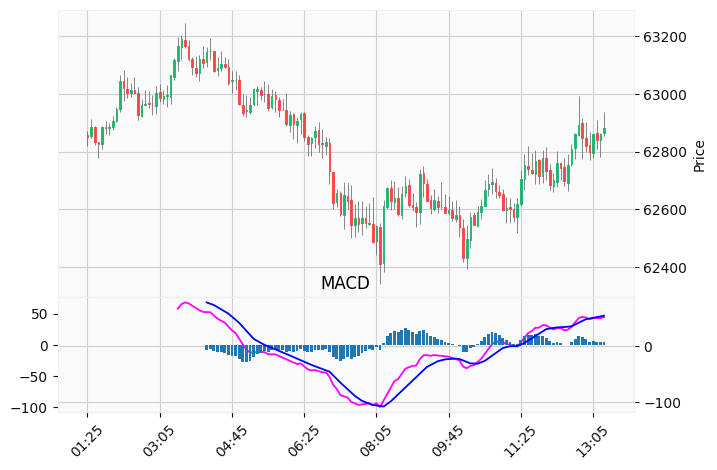

In [23]:
import mplfinance as mpf
cndl_72 = mt5.copy_rates_from_pos("BTCUSDm", mt5.TIMEFRAME_M5, 1, 144)
cndl_72_df = pd.DataFrame(cndl_72) 
cndl_72_df['time']=pd.to_datetime(cndl_72_df['time'], unit='s') 
cndl_72_df.rename(columns={'time': 'date', 'tick_volume' : 'volume'}, inplace=True)
cndl_72_df.set_index('date', inplace=True)
cndl_72_df.drop(['spread','real_volume'], axis=1, inplace=True)
 
macd = cndl_72_df.ta.macd(close='close', fast=12, slow=26, signal=9)
 
macd_plot = mpf.make_addplot(macd["MACD_12_26_9"], panel=1, color='fuchsia', title="MACD")
macd_hist_plot = mpf.make_addplot(macd["MACDh_12_26_9"], type='bar', panel=1) 
macd_signal_plot = mpf.make_addplot(macd["MACDs_12_26_9"], panel=1, color='b')
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
 
mpf.plot(cndl_72_df, type='candle', style='yahoo', addplot=plots)

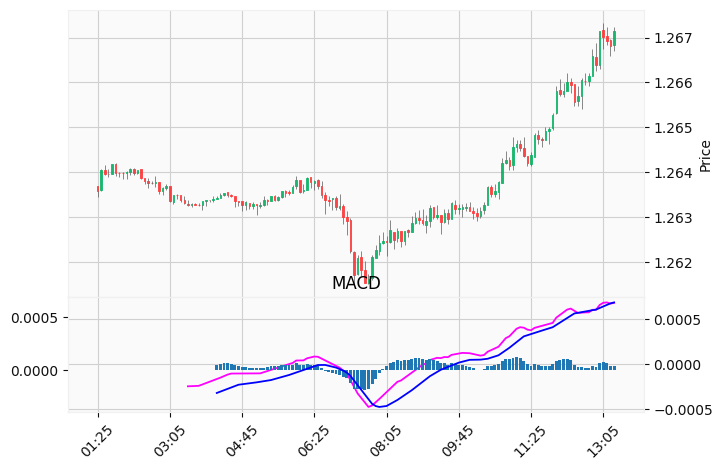

In [25]:
cndl_72 = mt5.copy_rates_from_pos("GBPUSDm", mt5.TIMEFRAME_M5, 1, 144)
cndl_72_df = pd.DataFrame(cndl_72) 
cndl_72_df['time']=pd.to_datetime(cndl_72_df['time'], unit='s') 
cndl_72_df.rename(columns={'time': 'date', 'tick_volume' : 'volume'}, inplace=True)
cndl_72_df.set_index('date', inplace=True)
cndl_72_df.drop(['spread','real_volume'], axis=1, inplace=True)
 
macd = cndl_72_df.ta.macd(close='close', fast=12, slow=26, signal=9)
 
macd_plot = mpf.make_addplot(macd["MACD_12_26_9"], panel=1, color='fuchsia', title="MACD")
macd_hist_plot = mpf.make_addplot(macd["MACDh_12_26_9"], type='bar', panel=1) 
macd_signal_plot = mpf.make_addplot(macd["MACDs_12_26_9"], panel=1, color='b')
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
 
mpf.plot(cndl_72_df, type='candle', style='yahoo', addplot=plots)

In [29]:
cndl_72 = mt5.copy_rates_from_pos("EURUSDm", mt5.TIMEFRAME_D1, 1, 144)
cndl_72_df = pd.DataFrame(cndl_72) 
cndl_72_df['time']=pd.to_datetime(cndl_72_df['time'], unit='s') 
cndl_72_df.rename(columns={'time': 'date', 'tick_volume' : 'volume'}, inplace=True)
cndl_72_df.set_index('date', inplace=True)
cndl_72_df.drop(['spread','real_volume'], axis=1, inplace=True)

rsi = cndl_72_df.ta.rsi(close='close',length=20)
rsi

cndl_72['EMA20'] = ta.ema(cndl_72['close'], length=20)
cndl_72['EMA40'] = ta.ema(cndl_72['close'], length=40)

cndl_72['EMA20']


ValueError: assignment destination is read-only

In [30]:
cndl_72 = mt5.copy_rates_from_pos("EURUSDm", mt5.TIMEFRAME_D1, 1, 144)

# 将数据转换为 DataFrame
cndl_72_df = pd.DataFrame(cndl_72)
cndl_72_df['time'] = pd.to_datetime(cndl_72_df['time'], unit='s')
cndl_72_df.rename(columns={'time': 'date', 'tick_volume': 'volume'}, inplace=True)
cndl_72_df.set_index('date', inplace=True)
cndl_72_df.drop(['spread', 'real_volume'], axis=1, inplace=True)

# 计算 RSI
cndl_72_df['RSI'] = ta.rsi(cndl_72_df['close'], length=20)

# 计算 EMA 20 和 EMA 40
cndl_72_df['EMA20'] = ta.ema(cndl_72_df['close'], length=20)
cndl_72_df['EMA40'] = ta.ema(cndl_72_df['close'], length=40)

# 显示结果
print(cndl_72_df.tail())

               open     high      low    close  volume        RSI     EMA20     EMA40
date                                                                                 
2024-06-26  1.07087  1.07174  1.06656  1.06795   35516  41.303049  1.074340  1.076641
2024-06-27  1.06795  1.07259  1.06766  1.07072   36721  44.406823  1.073995  1.076352
2024-06-28  1.07071  1.07242  1.06850  1.07131   39859  45.058191  1.073739  1.076106
2024-06-30  1.07347  1.07405  1.07300  1.07344    2641  47.400222  1.073711  1.075976
2024-07-01  1.07345  1.07759  1.07194  1.07359   40462  47.565910  1.073699  1.075860


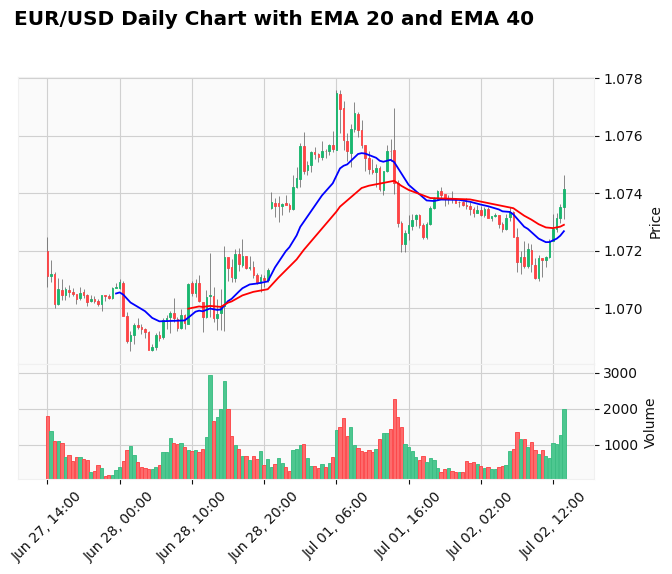

In [33]:
# 获取 EUR/USD 的每日数据
cndl_72 = mt5.copy_rates_from_pos("EURUSDm", mt5.TIMEFRAME_M30, 1, 144)

# 将数据转换为 DataFrame
cndl_72_df = pd.DataFrame(cndl_72)
cndl_72_df['time'] = pd.to_datetime(cndl_72_df['time'], unit='s')
cndl_72_df.rename(columns={'time': 'date', 'tick_volume': 'volume'}, inplace=True)
cndl_72_df.set_index('date', inplace=True)
cndl_72_df.drop(['spread', 'real_volume'], axis=1, inplace=True)

# 计算 EMA 20 和 EMA 40
cndl_72_df['EMA20'] = ta.ema(cndl_72_df['close'], length=20)
cndl_72_df['EMA40'] = ta.ema(cndl_72_df['close'], length=40)

# 使用 mplfinance 绘制蜡烛图并添加 EMA 20 和 EMA 40
ema20_plot = mpf.make_addplot(cndl_72_df['EMA20'], color='blue')
ema40_plot = mpf.make_addplot(cndl_72_df['EMA40'], color='red')

# 设置绘图样式
mpf.plot(cndl_72_df, type='candle', style='yahoo', addplot=[ema20_plot, ema40_plot], 
         title='EUR/USD Daily Chart with EMA 20 and EMA 40', 
         ylabel='Price', 
         ylabel_lower='Volume', 
         volume=True)